# Data Preprocessing

Material from Chapter 2 of Larose and Larose, 2015

12/20/2018 - Jeff Smith

In [2]:
% matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.__version__, pd.__version__

('1.14.2', '0.23.4')

## Missing Values

In [3]:
# Read the dataset with missing values
cars3 = pd.read_csv("../data/cars3.csv")
cars3.head(10)

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8.0,350.0,165.0,4209.0,12.0,1972.0,US.
1,31.9,4.0,NaN,71.0,1925.0,14.0,1980.0,Europe.
2,17.0,8.0,302.0,NaN,3449.0,11.0,1971.0,US.
3,15.0,8.0,400.0,150.0,3761.0,10.0,1971.0,US.
4,30.5,4.0,NaN,63.0,2051.0,17.0,1978.0,US.
5,23.0,8.0,350.0,125.0,3900.0,17.0,1980.0,US.
6,13.0,8.0,351.0,158.0,NaN,13.0,1974.0,US.
7,14.0,8.0,440.0,215.0,4312.0,9.0,1971.0,US.
8,25.4,5.0,183.0,77.0,3530.0,20.0,1980.0,Europe.
9,37.7,4.0,89.0,62.0,NaN,17.0,1982.0,Japan.


In [3]:
# Rows with missing weight values
cars3[cars3.weightlbs.isnull()]

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
6,13.0,8.0,351.0,158.0,NaN,13.0,1974.0,US.
9,37.7,4.0,89.0,62.0,NaN,17.0,1982.0,Japan.
97,18.0,6.0,250.0,88.0,NaN,15.0,1972.0,US.
261,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Rows with missing MPG values
cars3[cars3.mpg.isnull()]

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
14,NaN,6.0,225.0,90.0,3381.0,19.0,1981.0,US.
18,NaN,4.0,113.0,95.0,2278.0,16.0,1973.0,Japan.
22,NaN,6.0,200.0,81.0,3012.0,18.0,1977.0,US.
87,NaN,6.0,225.0,85.0,3465.0,17.0,1982.0,US.
103,NaN,4.0,105.0,70.0,2200.0,13.0,1980.0,US.
165,NaN,8.0,260.0,110.0,3365.0,16.0,1979.0,US.
261,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# the rows that originally had missing MPG values
# Keep track so that we can come back and check them
cars3.loc[[14, 18, 22, 87,103, 165],]

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
14,NaN,6.0,225.0,90.0,3381.0,19.0,1981.0,US.
18,NaN,4.0,113.0,95.0,2278.0,16.0,1973.0,Japan.
22,NaN,6.0,200.0,81.0,3012.0,18.0,1977.0,US.
87,NaN,6.0,225.0,85.0,3465.0,17.0,1982.0,US.
103,NaN,4.0,105.0,70.0,2200.0,13.0,1980.0,US.
165,NaN,8.0,260.0,110.0,3365.0,16.0,1979.0,US.


(array([20., 51., 44., 38., 36., 26., 21., 12.,  2.,  5.]),
 array([10.  , 13.66, 17.32, 20.98, 24.64, 28.3 , 31.96, 35.62, 39.28,
        42.94, 46.6 ]),
 <a list of 10 Patch objects>)

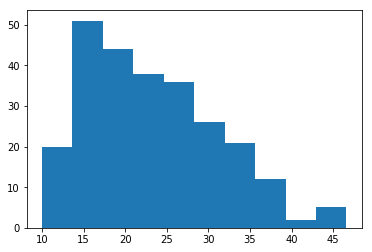

In [65]:
# Observed distribution of mpg values -- histogram
# Have to ignore the NAN values
plt.hist(cars3.mpg[~np.isnan(cars3.mpg)])

In [66]:
# Can sample from the distribution simply by sampling from the actual observed values
# So, we need to sample values from the vector with the NANs removed
mpgs = cars3.mpg[~np.isnan(cars3.mpg)]
for j in range(10):
    print(np.random.choice(mpgs))

32.2
12.0
26.0
24.3
27.0
31.5
14.0
27.2
16.0
31.0


In [67]:
#
# Use a lambda function to replace the NAN value with sampled values
#
mpgs = cars3.mpg[~np.isnan(cars3.mpg)]
def mpg(row):
    return np.random.choice(mpgs) if np.isnan(row.mpg) else row.mpg

cars3['mpg'] = cars3.apply(lambda row: mpg(row),  axis=1)


## Graphical Methods for Identifying Outliers

In [7]:
# Read the dataset with missing values
cars2 = pd.read_csv("../data/cars2.txt")

(array([ 1.,  0.,  1., 40., 59., 52., 37., 28., 35., 10.]),
 array([ 192.5 ,  672.95, 1153.4 , 1633.85, 2114.3 , 2594.75, 3075.2 ,
        3555.65, 4036.1 , 4516.55, 4997.  ]),
 <a list of 10 Patch objects>)

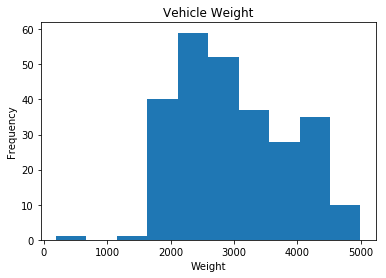

In [9]:
ax = plt.axes()
ax.set(xlabel='Weight', ylabel='Frequency',
       title='Vehicle Weight');
plt.hist(cars2['weightlbs'])

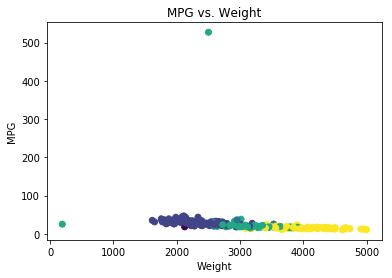

In [10]:
ax = plt.axes()
ax.set(xlabel='Weight', ylabel='MPG',
       title='MPG vs. Weight');
plt.scatter(cars2['weightlbs'], cars2['mpg'], c=cars2['cylinders']);

## Measures of Center and Spread

In [11]:
cars2.describe()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year
count,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000
mean,25.067681,5.593156,201.475285,106.349810,2992.872624,15.543726,1976.821293
std,32.031426,1.727050,108.546778,40.345257,867.451600,2.899886,3.623819
min,10.000000,3.000000,68.000000,46.000000,192.500000,8.000000,1971.000000
25%,16.950000,4.000000,103.000000,75.500000,2245.500000,14.000000,1974.000000
50%,22.000000,6.000000,156.000000,95.000000,2830.000000,16.000000,1977.000000
75%,28.900000,8.000000,302.000000,137.500000,3654.500000,17.000000,1980.000000
max,527.000000,8.000000,455.000000,230.000000,4997.000000,25.000000,1983.000000
